# K-Means: 샘플 데이터
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

## 데이터 준비
- 샘플 데이터를 만들어서 사용


In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150,
                  centers=3, 
                  n_features=2,
                  cluster_std = 0.5,
                  random_state=0)

#y = sample데이터 에서의 정답값
#학습 시킬 땐 안 씀

In [3]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [4]:
X[:5]

array([[2.60509732, 1.22529553],
       [0.5323772 , 3.31338909],
       [0.802314  , 4.38196181],
       [0.5285368 , 4.49723858],
       [2.61858548, 0.35769791]])

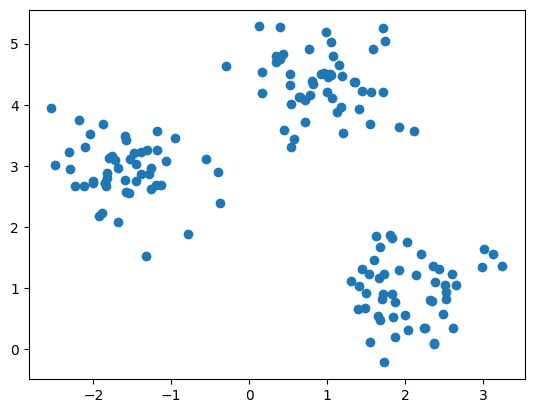

In [7]:
plt.scatter(X[:,0], X[:,1])
plt.show()

## 학습

In [8]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=2022)
km.fit(X)
# 비지도 학습이므로 학습 시에 y 안 넣음


C:\Users\026\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=2022)

In [9]:
y_pred = km.predict(X)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0,
       1, 1, 2, 0, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0,
       0, 0, 2, 1, 2, 1, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 0, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1,
       2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0])

0 = 0번째 cluster, 1 = 1번째 cluster
몇 번째 그룹에 속해있는지 index로 나옴

In [10]:
df = pd.DataFrame(X, columns=['X_1', 'X_2'])
df.head()

,X_1,X_2
0,2.605097,1.225296
1,0.532377,3.313389
2,0.802314,4.381962
3,0.528537,4.497239
4,2.618585,0.357698


In [11]:
df['y_pred'] = y_pred

In [12]:
df.head()

,X_1,X_2,y_pred
0,2.605097,1.225296,0
1,0.532377,3.313389,1
2,0.802314,4.381962,1
3,0.528537,4.497239,1
4,2.618585,0.357698,0


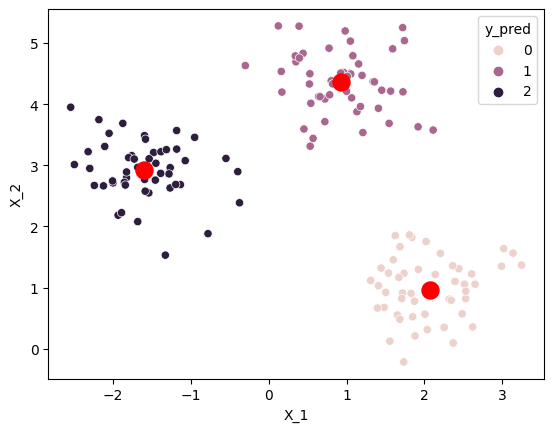

In [19]:
sns.scatterplot(data=df, x='X_1', y='X_2', hue = 'y_pred')
plt.scatter(centroid[:,0], centroid[:,1], 
           s=150, marker='o', c='red')

In [16]:
centroid = km.cluster_centers_
centroid

array([[ 2.06521743,  0.96137409],
       [ 0.9329651 ,  4.35420712],
       [-1.5947298 ,  2.92236966]])

## Elbow Method


In [21]:
inertias = []

for k in range(2, 11):    
    km = KMeans(n_clusters=k, random_state=2022)
    km.fit(X)
    inertias.append(km.inertia_)
    # fit predict, inertias append, 마지막에 print

print(inertias)

C:\Users\026\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\026\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\026\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\026\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

[283.46101780209307, 72.47601670996698, 62.84061768542222, 54.29757489773776, 47.85292137212694, 39.88978825654857, 35.70304272594484, 30.624470574346063, 26.97109816223398]


C:\Users\026\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


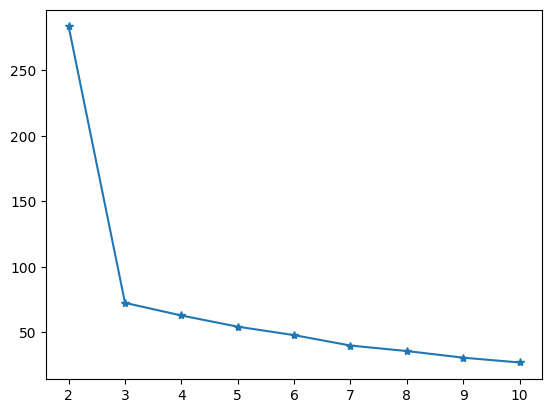

In [24]:
plt.plot(range(2,11), inertias, marker='*')

# Iris 데이터를 사용해서 Kmeans
---
## 데이터 읽어오기

In [28]:
from sklearn import datasets

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [29]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
X = df.iloc[:,:2]
X.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [31]:
inertias = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=2022)
    km.fit(X)
    inertias.append(km.inertia_)

print(inertias)

C:\Users\026\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\026\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\026\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\026\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

[58.20409278906673, 37.05070212765958, 28.034982153246226, 21.00212598224944, 17.70301535087719, 14.87059523809524, 12.728480602730604, 11.14661940836941, 9.770409279231263]


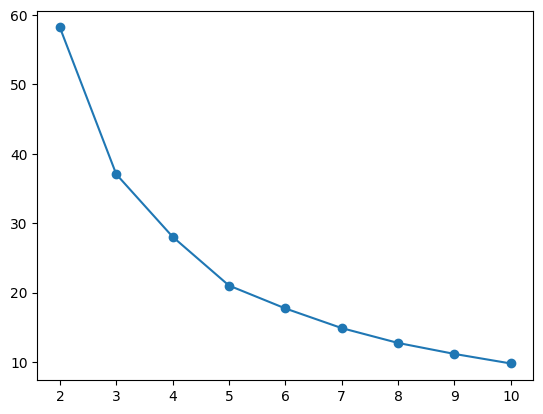

In [ ]:
plt.plot(range(2,11), inertias, marker='o')

In [39]:
target = iris.target
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

C:\Users\026\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

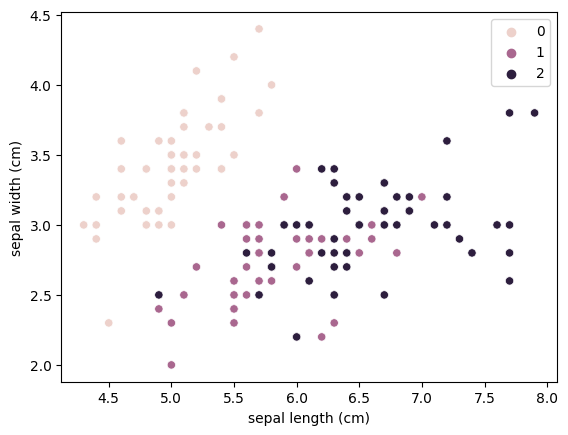

In [41]:
km = KMeans(n_clusters=3, random_state=2022)
km.fit(X)

sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue = target)
# plt.scatter(centroid[:,0], centroid[:,1], 
#            s=150, marker='o', c='red')

결과는 지도 학습이 잘 나옴

딥러닝은 비지도 학습 -> 데이터 전처리 과정의 간소화